## An Introduction to Neural networks

Neural networks (NNs) and particularly a subset of neural networks (deep neural networks; DNNs) have become the poster child of modern AI due to its recent booming success in solving a multitude of complex problems, such as beating the world's GO champion, facilitating self-driving cars and much more. Here you will learn the basics of neural networks through interactive code in simple python (it's easier than it sounds!). This notebook introduces neural networks in general.

### So what is a neural network? 
We can try to answer that by considering the simplest NN possible: the perceptron.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
### make FIGURE of perceptron

Borrowing language from neuroscience, we speak of neurons and synapses (the latter more often referred to as 'weights'). A perceptron has two input neurons and one output neuron. A synapse connects input 1 to the output neuron and a second synapse connects from input 2 to the output.

Just like biological neural networks, the post synaptic (output) neuron takes input from incoming synapses, and integrates them (adding together the parts). If this sum reaches a given threshold (referred to as the bias), the neuron fires, otherwise it does nothing. We represent this output as 1 (fires) or 0 (doesn't fire).

To see how simple the basic idea is, let's make a naive implementation in Python!

In [3]:
def activation(x, threshold):
    if x >= threshold: return 1
    else: return 0


def perceptron(inputs, weights, b=1):
    """
    inputs  : The values in the input neurons (list)
    weights : The weights connecting n1 and n2 to the output neuron (list)
    b       : The threshold below which the postsynaptic neuron won't fire (number)
    """
    in1, in2 = inputs
    w1, w2 = weights
    s = in1*w1 + in2*w2
    return activation(s, b)

In [4]:
# Are you able to make a perceptron that takes 3 inputs? What about an arbitrary number of inputs?
# A: s = sum([input[i]*weight[i] for i in len(inputs)])

So what's so special about this network? Suppose we have the following dataset from a fishing trip, by recording the weight and length for cod and haddock. We represent the class as either a 1 (cod) or 0 (haddock).

In [5]:
import pandas as pd
df = pd.DataFrame({"Weight":[1.4, 1.6, 1.6, 2,  1.4,  1.35, 1.5,  1.7], 
                   "Length":[.6,  .4,  .7,  .6,  .5,   .35, .25, 0.7], 
                   "Class" :[0,    1,  0,  1,    0,     1,   1,   0]})
df

,Weight,Length,Class
0,1.40,0.60,0
1,1.60,0.40,1
2,1.60,0.70,0
3,2.00,0.60,1
4,1.40,0.50,0
5,1.35,0.35,1
6,1.50,0.25,1
7,1.70,0.70,0


First thing we do is always to visualize our data.

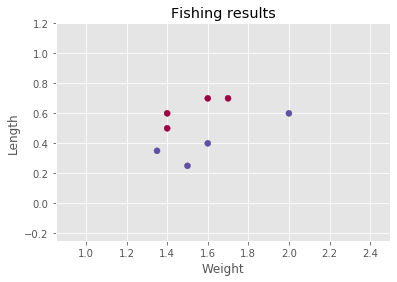

In [6]:
from matplotlib import pyplot as plt

# Define the figure boundaries
X = df.drop(labels=["Class"], axis=1).values
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Draw a scatter plot of the weight and length of the fishes
plt.scatter(x= df.Weight, y = df.Length, c = df.Class, cmap=plt.cm.Spectral)
plt.xlabel("Weight"); plt.ylabel("Length")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Fishing results")

plt.show()

Is it possible for our perceptron to learn the difference between the cod and the haddock? The function below lets you plot the predicted output of the perceptron over all (weight, length)-pairs. (You are not expected to understand how the plotting function is implemented!).

In [7]:
# Modified from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-download-auto-examples-neighbors-plot-classification-py

def plot_decision(clf, weights, b):
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make a prediction for every (weight, length) pair
    Z = list(map(lambda x: clf(x, weights, b), np.c_[xx.ravel(), yy.ravel()]))
    Z = np.array(Z).reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=df.Class, cmap=plt.cm.Spectral)

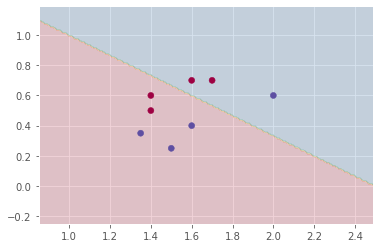

In [8]:
weights = [.4, .6]
b = 1

plot_decision(perceptron, weights=weights, b=b)

The transparent background is the perceptron's prediction. However, we selected our weights arbitrarily, so the above prediction is completely wrong. However, it should be possible to find a set of weights so that it will successfully seperate the red from the blue dots.

#### Ex.1 a) Try to change the weights and the threshold b, and see how it affects the decision boundary. b) Change the parameters such that it properly separates the red and the blue dots.

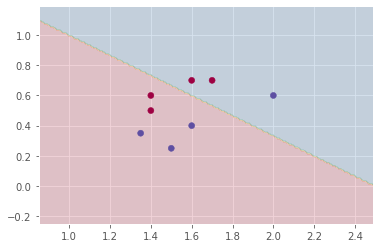

In [9]:
## your code here

plot_decision(perceptron, weights, b)

Now, we obviously don't want to manually fiddle with the parameters, but we want the perceptron to learn its own weights by itself. How is this achieved? Well we need to update the weights based on the performance of the perceptron. The performance can be captured as the error:
#### Error = target value - predicted value = $ y - \hat y $

So if our prediction is lower then the target, we want our prediction to be higher. This is achieved by increasing the weight from the synapses in the case of a positive input and decreasing the weight if the input is negative. On the other hand, if the prediction is larger than the desired target, we do the opposite. This leads to the update rule:

#### $$ W \leftarrow W + \eta  (Y - \hat Y) X, $$
where $\eta$ is the learning rate - to control how much we want to change the weights in each iteration. Notice that we multiply by $X$ to correct for the sign (+ or -).

In [10]:
# We split the data into the features X and the target y
X = df.drop(["Class"], axis=1).values 
y = df.Class.values

#### The function `train` implements this update rule. However,something is missing. Add the code necessary for it to work. (The [ cell below](#another_cell) will throw an error message if the code in `train` is incorrect)



[Another Cell](#another_cell)

In [22]:
def train(clf, X, y, weights, b, learning_rate=0.1):
    t = b
    w1, w2 = weights
    for x_i, target in zip(X, y):
        
        pred = perceptron(x_i, [w1, w2], t)
        
        ## ADD YOUR CODE HERE
        #error = target - pred
        
        w1 +=  learning_rate * error * x_i[0]
        w2 +=  learning_rate * error * x_i[1]
        t +=  learning_rate * error
    
    return w1, w2, b


#### Now we put it to the test
<a id='another_cell'></a>

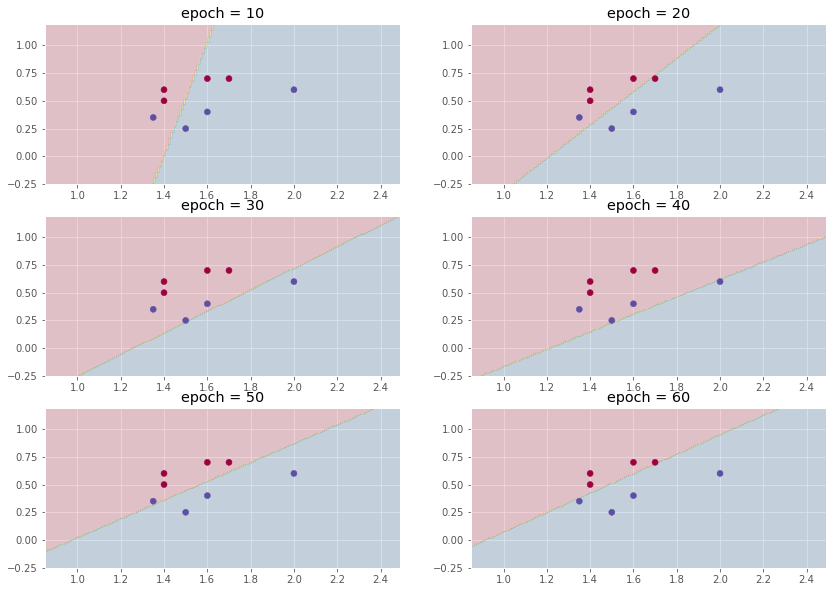

In [23]:
# initialize some random weights
w1, w2, b = .6, -.1, 1

fig = plt.figure(figsize=(14,10))
j=0
for i in range(60):

    w1, w2, b = train(perceptron, X, y, [w1, w2], b)
    if i%10 == 0: 
        j += 1
        fig.add_subplot(3, 2, j); 
        plt.title(f'epoch = {i+10}')
        plot_decision(perceptron, [w1, w2], b)

And voila: the perceptron successfully Notice how the decision boundary converges as we keep training it, until it reaches a satisfactory result. 

So just by updating the weights (synapses) of the network in a clever fashion, we can make it do some impressive things. In fact, the perceptron is guaranteed to converge as long as the data is linearly seperable! On the other hand, if the data is non-linear, the perceptron fails disastrously.

The key to overcoming this problem is to add a hidden layer between the input layer and the output layer, making a multilayer perceptron. We will not implement this by ourselves, but use implementations found in other python libraries, such as `scikit-learn` or `tensorflow`.